## Import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from os.path import join

In [2]:
from src.addons.images import random_binary_images
from src.addons.losses import WatermarkLoss
from src.config import DIMS_IMAGE, DIMS_MARK, MODEL_PATH, TEST_PATH, TRAIN_PATH
from src.processors import load_image, preprocess_input, preprocess_output

## Model

In [3]:
embedding_model = tf.keras.models.load_model(
    join(MODEL_PATH, f"embedding_model_Attacked.h5"),
    custom_objects={"WatermarkLoss": WatermarkLoss},
    compile=False
)

Metal device set to: Apple M1 Pro


2022-03-15 21:25:56.502229: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-15 21:25:56.502356: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
extracted_model = tf.keras.models.load_model(
    join(MODEL_PATH, f"extraction_model_Attacked.h5"),
    custom_objects={"WatermarkLoss": WatermarkLoss},
    compile=False
)

## Input

### Marks

In [5]:
marks = random_binary_images(batch_size=1, shape=DIMS_MARK[0])

2022-03-15 21:25:56.743705: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-15 21:25:56.743769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


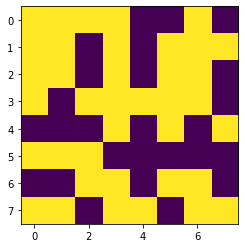

In [6]:
plt.imshow(marks[0])

### Image

In [7]:
image = load_image("/Users/schalappe/Documents/Lab/Engineer/Projects/watermark_resolution/data/Testing/2.png")

2022-03-15 21:25:56.838873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


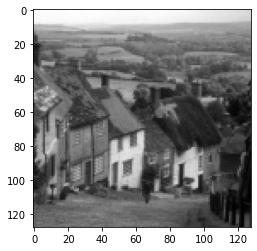

In [8]:
plt.imshow(image, cmap="gray")

In [9]:
inputs = preprocess_input(inputs=image, mode="tf")
inputs = tf.expand_dims(inputs, axis=0)

## Output

### Image

In [10]:
output_image = embedding_model.predict([inputs, marks])

2022-03-15 21:25:57.008111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [11]:
embedding_image = preprocess_output(output_image, mode="tf")

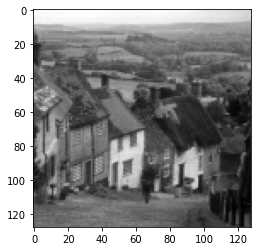

In [12]:
plt.imshow(embedding_image[0], cmap="gray")

### Marks

In [13]:
output_mark = extracted_model.predict(embedding_image)

2022-03-15 21:25:57.262390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


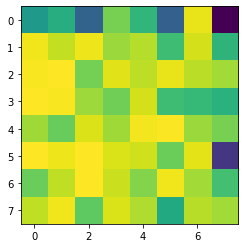

In [14]:
plt.imshow(output_mark[0])